In [1]:
import sys
sys.path.append("../src")  

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import math
from modelo_autoregresivo import ModeloAutoregresivo
from generacion import GeneradorTexto

In [3]:
# Cargar vocabulario y datos
with open("vocab.json", "r", encoding="utf-8") as f:
    vocab = json.load(f)
inv_vocab = {v: k for k, v in vocab.items()}
vocab_size = len(vocab)

In [4]:
# Cargar modelo entrenado
modelo = ModeloAutoregresivo(vocab_size)
modelo.load_state_dict(torch.load("modelo_entrenado.pth"))
modelo.eval()

# Crear generador
generador = GeneradorTexto(modelo, inv_vocab)

In [5]:
# Texto inicial
secuencia_inicial = "ho"
entrada = torch.tensor([[vocab[c] for c in secuencia_inicial]])

In [6]:
# Muestreo por temperatura 
temperaturas = [0.2, 0.8, 1.2]
print("Generación con distintas temperaturas")
for T in temperaturas:
    generado = generador.generar_con_temperatura(entrada, num_tokens=30, temperatura=T)
    print(f"Temperatura {T}: {generado}")


Generación con distintas temperaturas
Temperatura 0.2: hoaeraaaaaaaaaaaaaaaaaaaaaaaaaaa
Temperatura 0.8: hor<pad>mcsaea arkrs s l mses lerese
Temperatura 1.2: hoakeracsáimesea oea efgitrohliá


In [7]:
# Muestreo por top-k 
top_ks = [5, 20, 50]
print("Generación con distintos top-k")
for k in top_ks:
    generado = generador.generar_top_k(entrada, num_tokens=30, k=k)
    print(f"Top-k {k}: {generado}")

Generación con distintos top-k
Top-k 5: hor onunrvs osioeos nunnielunócn
Top-k 20: ho<pad>nimuslamlclgrmfuseaolfseloá t
Top-k 50: hoaaá orlpes rroscóneoomosemspav


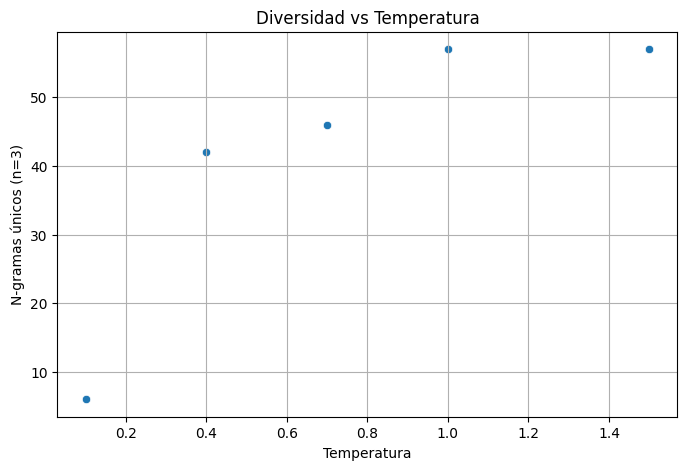

In [8]:
# Diversidad vs Temperatura 
def diversidad_ngramas(texto, n=3):
    return len(set([texto[i:i+n] for i in range(len(texto)-n+1)]))

temperaturas = [0.1, 0.4, 0.7, 1.0, 1.5]
diversidades = []

for T in temperaturas:
    generado = generador.generar_con_temperatura(entrada, num_tokens=50, temperatura=T)
    diversidad = diversidad_ngramas(generado)
    diversidades.append(diversidad)

plt.figure(figsize=(8,5))
sns.scatterplot(x=temperaturas, y=diversidades)
plt.title("Diversidad vs Temperatura")
plt.xlabel("Temperatura")
plt.ylabel("N-gramas únicos (n=3)")
plt.grid(True)
plt.show()